In [50]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/kirill/Projects/NIR')
sys.path.append('/home/kirilman/Projects/nir/nir/')
import seaborn as sns
import myutils
import numpy as np
import matplotlib.pylab as plt
from pomegranate import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, minmax_scale, StandardScaler
pd.set_option('display.max_columns', 40)

from sklearn.tree import DecisionTreeClassifier as tree
from sklearn.metrics import accuracy_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def read_data(start_index, stop_index):
    with open('kdd_test.txt','r') as file:
        data = []
        target = []
        for i,line in enumerate(file):
            if i == 0:
                continue
            elems = line.replace('\n','').split(',')
            data += [[float(x) for x in elems[start_index:stop_index]]]
            target += [elems[41]]
    return data, target

In [3]:
data, target = read_data(4,25)
# test_data = data[80000:100000]
# test_target = target[80000:100000]
# data = data[:80000]
# target = target[:80000]


#test_data = data[6000:7000]
# test_target = target[6000:7000]
data = data[:125000]
# target = target[:30000]

In [4]:
frame = pd.DataFrame(data)
frame[frame.shape[1]] = pd.DataFrame(target)
frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,181.0,5450.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,normal
1,239.0,486.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,normal
2,235.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,normal
3,219.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,normal
4,217.0,2032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,normal


In [5]:
temp_m = [frame.mean() !=0.0][0]
index = [ i for i,el in enumerate(temp_m) if el==True]
index+=[frame.shape[1]-1]

frame = frame[index]
frame.columns = np.arange(0,frame.shape[1])
frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,181.0,5450.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,normal
1,239.0,486.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,normal
2,235.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,normal
3,219.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,normal
4,217.0,2032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,normal


In [6]:
a = frame[frame.shape[1]-1].value_counts()>20000
uses_classes = []
for i,x in enumerate(a):
    if x:
        uses_classes+=[a.index[i]]
uses_classes

arr_mask = []
for cl in uses_classes:
    arr_mask+=[frame.loc[:,frame.shape[1]-1] == cl]
    
for i,cur_mask in enumerate(arr_mask):
    if i == 0:
        mask = np.zeros((frame.shape[0]),dtype = bool)
        #mask = mask | cur_mask
    else:
        mask = mask | cur_mask
print(np.sum(mask))

frame = frame[mask]

60102


In [7]:
temp_m = [frame.mean() !=0.0][0]
index = [ i for i,el in enumerate(temp_m) if el==True]
index+=[frame.shape[1]-1]

frame = frame[index]
frame.columns = np.arange(0,frame.shape[1])
frame.head()

,0,1,2,3,4
7601,0.0,6.0,5.0,0.83,neptune
7602,0.0,16.0,15.0,0.94,neptune
7793,1032.0,316.0,316.0,0.00,smurf
7794,1032.0,511.0,511.0,0.00,smurf
7795,1032.0,511.0,511.0,0.00,smurf


/home/kirilman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kirilman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


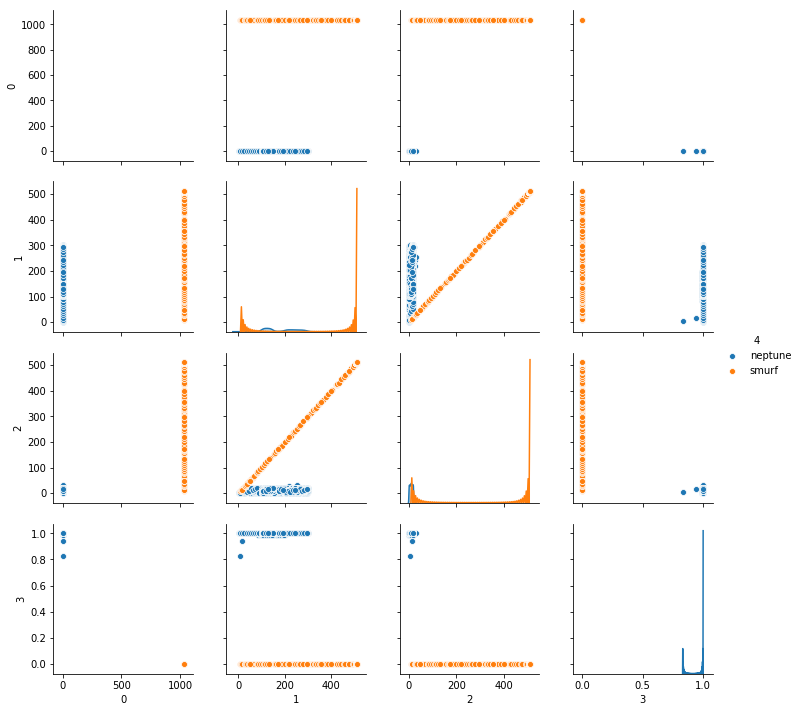

In [8]:
sns.pairplot(frame,hue = 4)

In [9]:
len(frame)

60102

In [10]:
# test_data = data[6000:7000]
# test_target = target[6000:7000]
p = int(len(frame)*0.6)
print(p)
test_data = frame.drop(frame.shape[1]-1,axis=1).values[p:]
test_target = frame[frame.shape[1]-1].values[p:]
print(len(test_data))
data = frame.drop(frame.shape[1]-1,axis=1).values[:p]
target = frame[frame.shape[1]-1].values[:p]

36061
24041


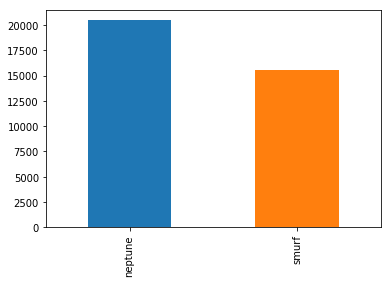

In [11]:
pd.DataFrame(target)[0].value_counts().plot.bar()
#target.value_counts().plot.bar()

In [12]:

#нормализация
# data = pd.DataFrame(minmax_scale(data))
# test_data = pd.DataFrame(minmax_scale(test_data))
# data = StandardScaler().fit_transform(data)
# test_data = StandardScaler().fit_transform(test_data)

data = pd.DataFrame(data)
test_data = pd.DataFrame(test_data)

states = {}
target = pd.DataFrame(target)
N_comp = len(pd.unique(target[0]))
print('Количество состояний {}'.format(N_comp))
for i,elem in enumerate(pd.unique(target[0].values)):
    states[elem] = i
print(states)

y_train = []
for x in target[0]:
    y_train+=[states[x]]
print(len(y_train))
y_train = list(map(str,y_train))
y_train = list(map(myutils.rename_state,y_train))

print(y_train[:10])
x_train = data.values.tolist()
print(len(x_train), len(y_train))

Количество состояний 2
{'neptune': 0, 'smurf': 1}
36061
['s0', 's0', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1']
36061 36061


In [13]:
model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components = N_comp,X = [x_train],
                                       labels=[y_train],algorithm='labeled' )

# model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components = N_comp,X = [x_train],
#                                       lr_decay = 0.6)
model
with open('model.txt','w') as file:
    file.write(str(model.to_json()))

In [14]:
#Тестовая выборка
y_test = []
for x in test_target:
    #if x == 'loadmodule' or x=='perl':
        #continue
    y_test += [states[x]]
x_test = test_data

In [15]:
print('x_train: {}, y_train: {}, x_test: {}, y_test: {}'.format(len(x_train), len(y_train), len(x_test), len(y_test)))

x_train: 36061, y_train: 36061, x_test: 24041, y_test: 24041


In [16]:
def tree_model(x_train, y_train, x_test,y_test):
    model = tree()
    model.fit(X=x_train, y=y_train)
    print(model)
    y_pr = model.predict(x_test)
    acc = np.sum(np.array(y_pr) == np.array(y_test))/len(y_pr)
    print(y_test[:5])
    print(y_pr[:5])
    print('Точность = {:.5f}'.format(acc))
    print(accuracy_score(y_test, y_pr))

In [17]:
tree_model(x_train, myutils.get_y_train(y_train), x_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[1, 1, 1, 1, 1]
[1 1 1 1 1]
Точность = 1.00000
1.0


In [18]:
y_pr = model.predict(x_test)
print(y_pr[:10])
print(y_test[:10])
acc = np.sum(np.array(y_pr) == np.array(y_test))/len(y_pr)
print(acc)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.7015931117673974


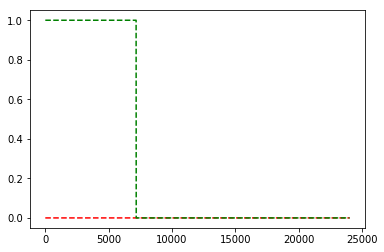

In [19]:
plt.plot(y_pr,'r--')
plt.plot(y_test,'g--')

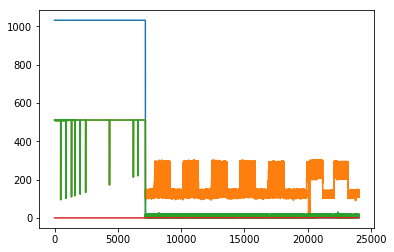

In [20]:
plt.plot(x_test[0])
plt.plot(x_test[1])
plt.plot(x_test[2])
plt.plot(x_test[3])

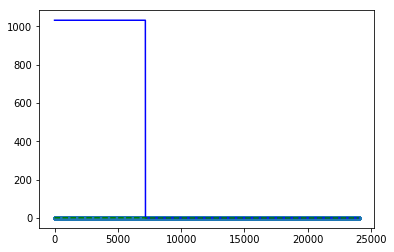

In [21]:
plt.plot(y_pr,'r--')
plt.plot(y_test,'.')
plt.plot(x_test[0],'b')
plt.plot(y_test,'g--')

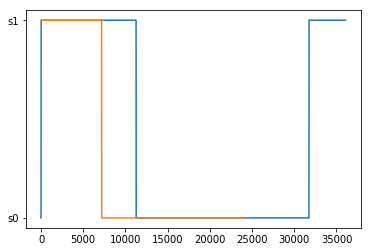

In [22]:
plt.plot(y_train)
plt.plot(y_test)

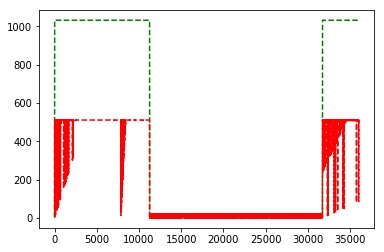

In [23]:
x_train = np.array(x_train)
plt.plot(x_train[:,0],'g--')
plt.plot(x_train[:,2],'r--')

# Построить смесь гауссовых распределений

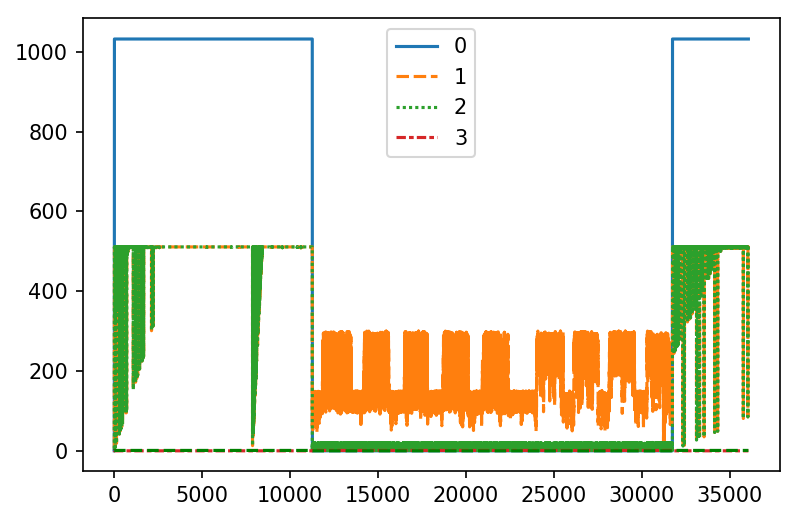

In [32]:
fig = plt.figure(dpi = 150)
sns.lineplot(style="event",data=pd.DataFrame(x_train))
fig.axes[0].plot(myutils.get_y_train(y_train),'g--',label='Класс')

/home/kirilman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kirilman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


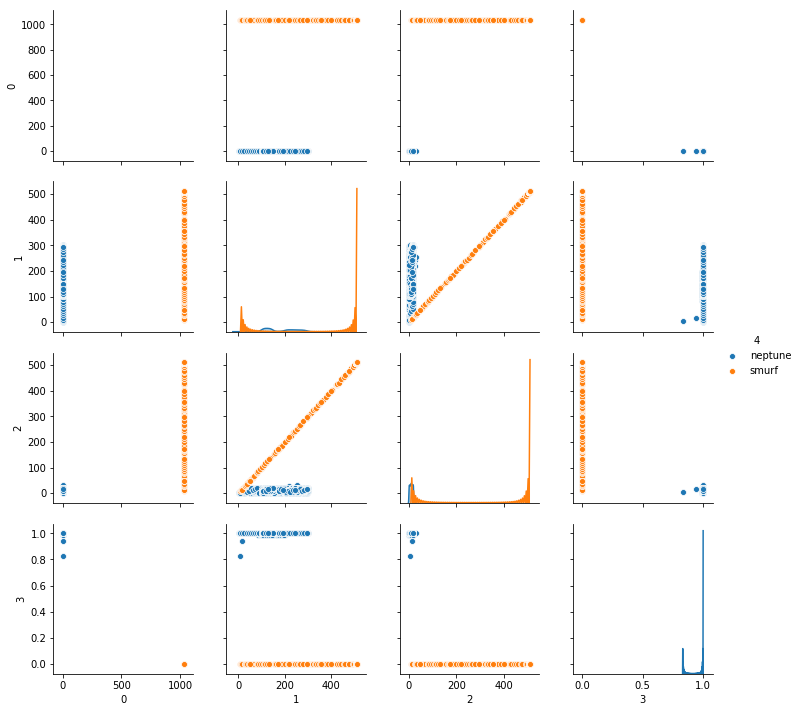

In [31]:
sns.pairplot(frame,hue = 4)

array([[   0.,    6.],
       [   0.,   16.],
       [1032.,  316.],
       ...,
       [1032.,  511.],
       [1032.,  508.],
       [1032.,  511.]])

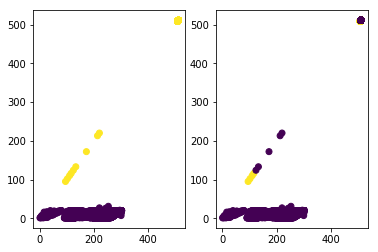

In [47]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(np.array(x_test[1]), np.array(x_test[2]), c = y_test)
ax[1].scatter(np.array(x_test[1]), np.array(x_test[2]), c = p)

In [75]:
x_train[0]

array([0.  , 6.  , 5.  , 0.83])

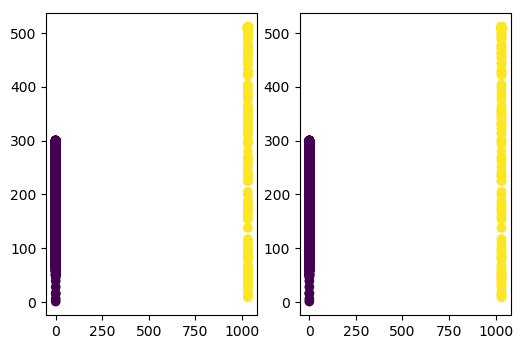

In [77]:
#между 0 и 1
x_train = np.array(x_train)
gmm = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution,2,x_train[:,:2]);
y_pr = gmm.predict(x_train[:,:2])
myutils.plot_scatter_test_predict(x_train[:,:2],myutils.get_y_train(y_train), y_pr)

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "MultivariateGaussianDistribution",
            "parameters" : [
                [
                    184.7902833219745,
                    10.760198617466653
                ],
                [
                    [
                        4034.7549674107227,
                        63.461003585047486
                    ],
                    [
                        63.461003585047486,
                        92.34527983592837
                    ]
                ]
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "MultivariateGaussianDistribution",
            "parameters" : [
                [
                    510.45099555383723,
                    510.45299310522586
                ],
                [
                    [
                        58.95962897858152,
  

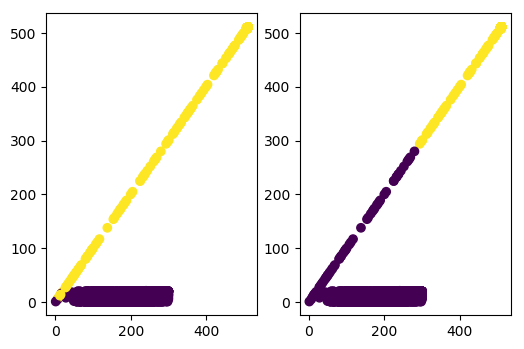

In [86]:
#между 1 и 2
gmm = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution,2,x_train[:,1:3]);
y_pr = gmm.predict(x_train[:,1:3])
print(gmm)
myutils.plot_scatter_test_predict(x_train[:,1:3],myutils.get_y_train(y_train), y_pr)

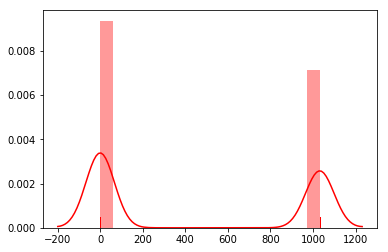

In [97]:
sns.distplot(x_train[:,0],label='1',color='r',rug=True)

In [26]:
p = gmm.predict(x_test)

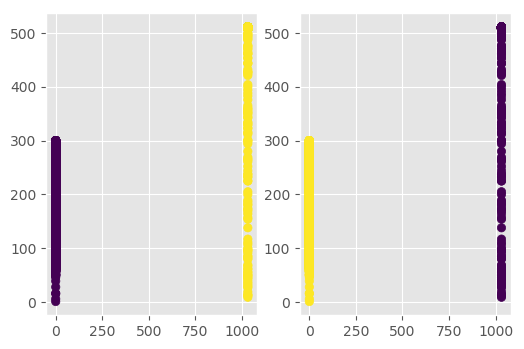

In [161]:
gmm = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, n_components = 2, X = x_train)
y_pr = gmm.predict(x_train)
myutils.plot_scatter_test_predict(x_train, myutils.get_y_train(y_train), y_pr )

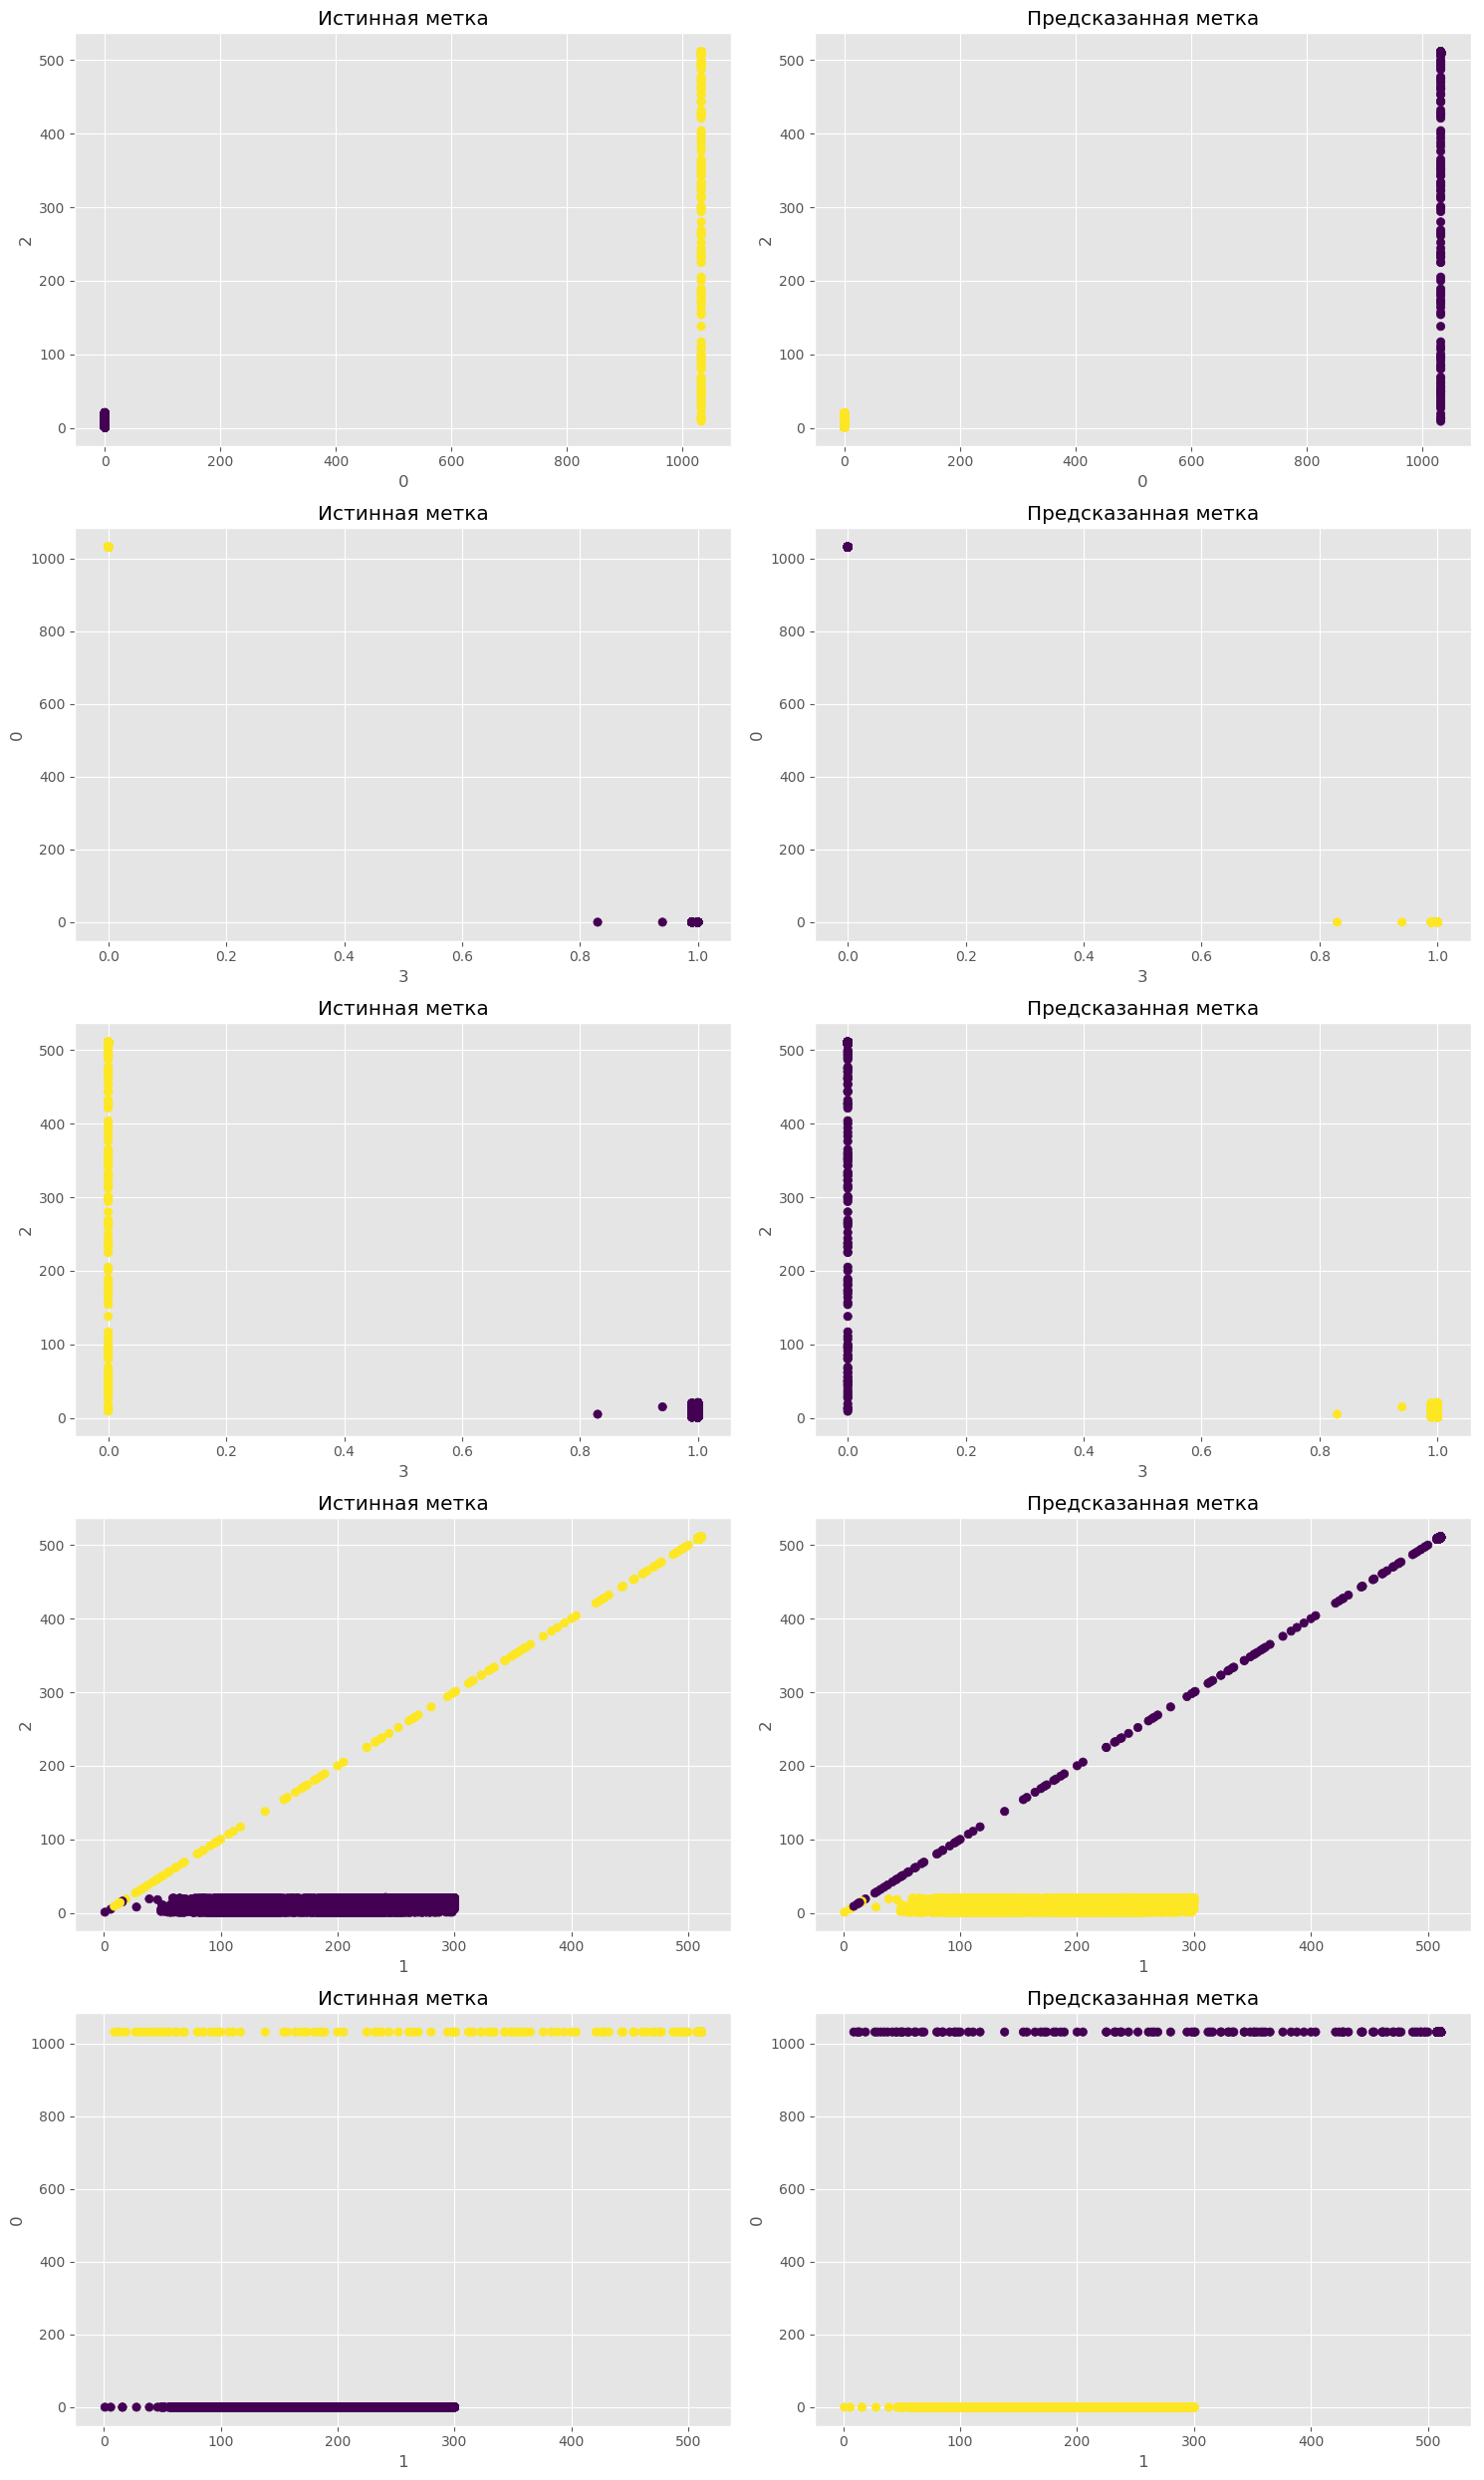

In [162]:
myutils.plot_scatter_test_predict(x_train, myutils.get_y_train(y_train), y_pr, random = True, count=5)

In [163]:
y_pr = gmm.predict(x_test)

CPU times: user 2.43 s, sys: 32.6 ms, total: 2.47 s
Wall time: 2.67 s


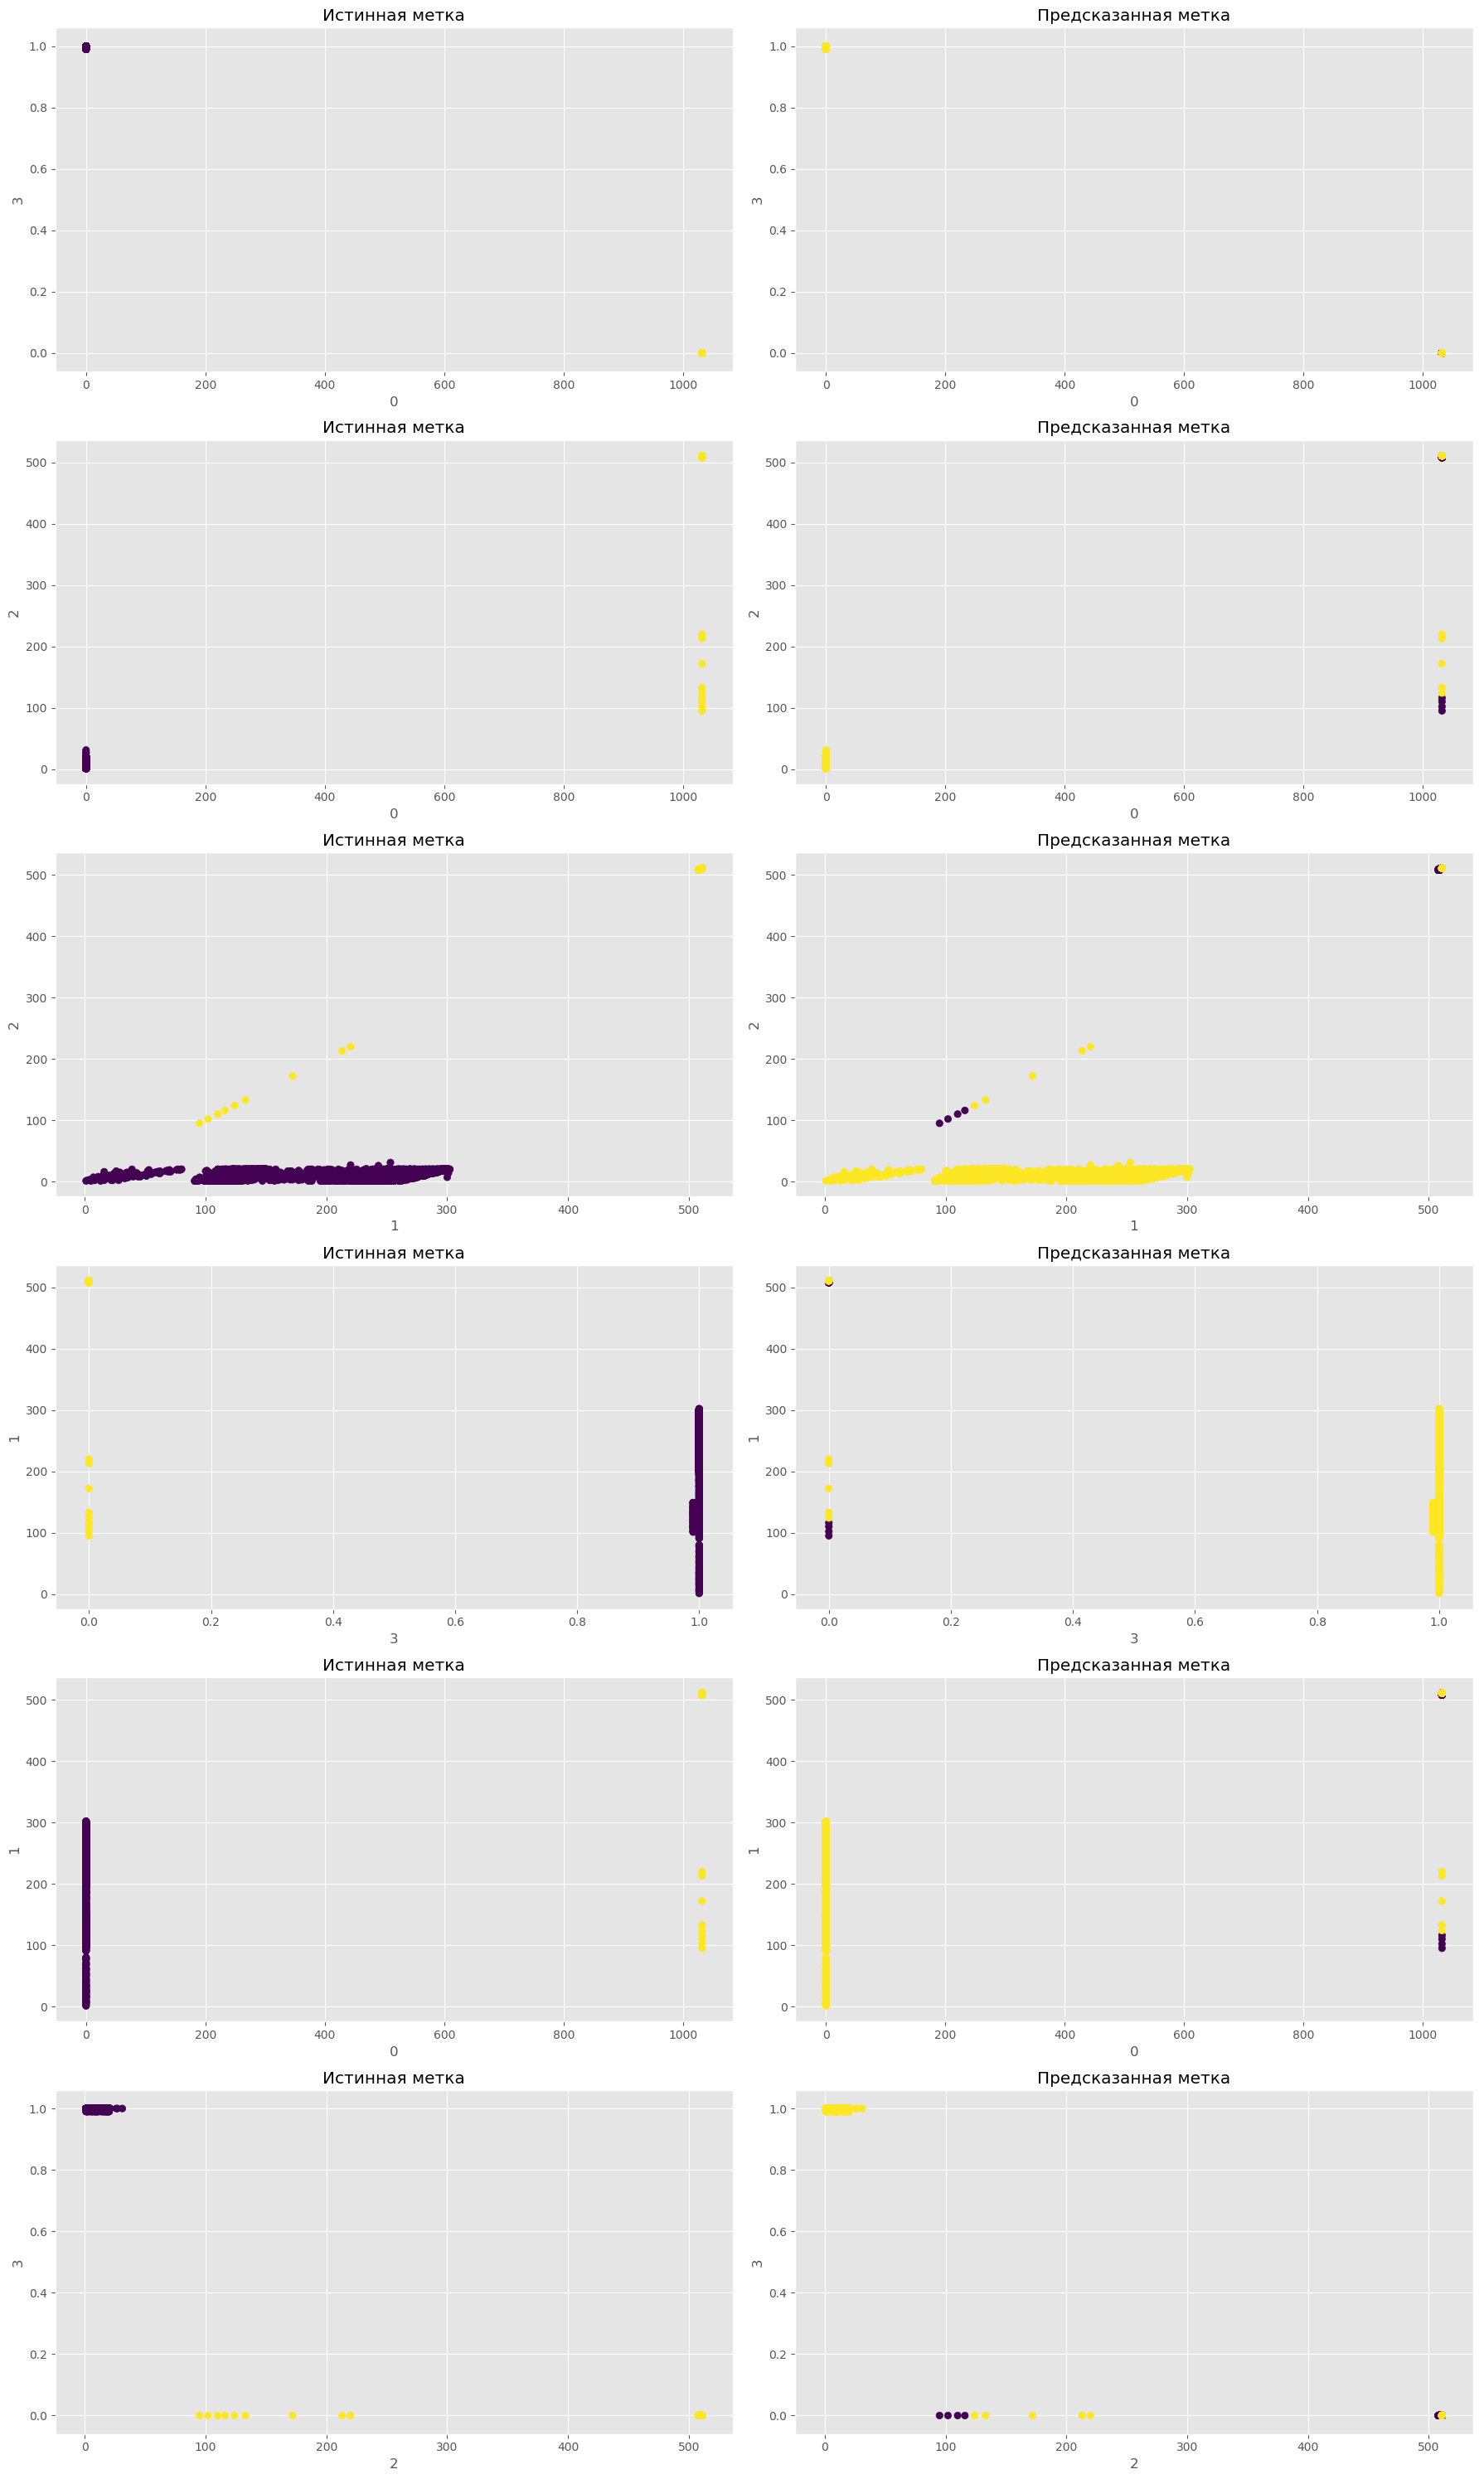

In [167]:
%%time 

myutils.plot_scatter_test_predict(x_test, y_test, y_pr, random=True , count = 6)

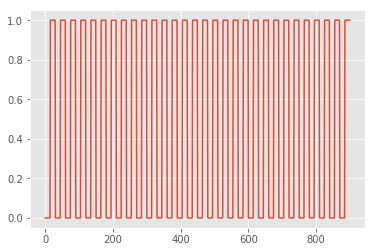

In [314]:
plt.plot(z)

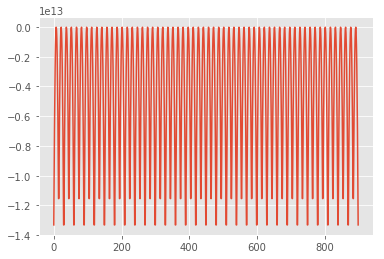

In [317]:
z = gmm_test.log_probability(t)
plt.plot(z)

In [332]:
gmm_test.distributions[0].parameters[0][0]

0.0

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "MultivariateGaussianDistribution",
            "parameters" : [
                [
                    0.0,
                    184.96431012596426
                ],
                [
                    [
                        1e-08,
                        0.0
                    ],
                    [
                        0.0,
                        4015.9207553416136
                    ]
                ]
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "MultivariateGaussianDistribution",
            "parameters" : [
                [
                    1032.0,
                    508.9679697028051
                ],
                [
                    [
                        1e-08,
                        0.0
                    ],
                    [
          

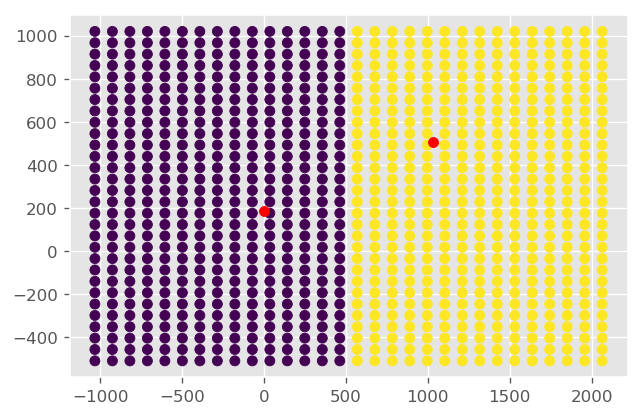

In [356]:
gmm_test = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, n_components = 2, X = x_train[:,:2])
print(gmm_test)
N1 = 2
middle = (x_train[:,0].max() - x_train[:,0].min())/2
x1 = np.linspace(x_train[:,0].min() - N1*middle, x_train[:,0].max() + N1*middle,30)

middle = (x_train[:,1].max() - x_train[:,1].min())/2
x2 = np.linspace(x_train[:,1].min() - N1*middle, x_train[:,1].max() + N1*middle,30)
xx, yy = np.meshgrid(x1,x2)
t = np.c_[ xx.ravel(), yy.ravel()]

print(x1[:10])
print(x2[:10])
print(t[:10])
fig = plt.figure(dpi = 120)
print(len(t))
z = gmm_test.predict(t)
# z = gmm_test.log_probability(t)

# print(z)
plt.scatter(t[:,0],t[:,1], c = z);
plt.scatter(gmm_test.distributions[0].parameters[0][0],gmm_test.distributions[0].parameters[0][1],c='r')
plt.scatter(gmm_test.distributions[1].parameters[0][0],gmm_test.distributions[1].parameters[0][1],c='r')
#plt.scatter(gmm_test.distributions[2].parameters[0][0],gmm_test.distributions[2].parameters[0][1],c='r')

# plt.scatter(x_train[:,0],x_train[:,1],c=z)

z = gmm_test.predict(x_train[:,:2])
plt.scatter(xx,yy,z);
plt.scatter(x_train[:,0],x_train[:,1],c=z)

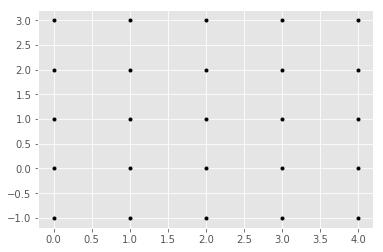

In [321]:
xvalues = np.array([0, 1, 2, 3, 4]);
yvalues = np.array([-1, 0, 1, 2, 3]);
xx, yy = np.meshgrid(xvalues, yvalues)
xx, yy
plt.plot(xx, yy, marker='.', color='k', linestyle='none');

In [322]:
t.shape

(900, 2)

In [217]:
GeneralMixtureModel(MultivariateGaussianDistribution,n)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)